In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# It all starts with some data 

In [81]:
df_train=pd.read_csv('Train.csv')

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [83]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [84]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [85]:
##Item_Weight contains 1463 null values
##Outlet_Size contains 2410 null values

In [86]:
df_train.shape

(8523, 12)

In [87]:
## We cannot drop these columns as they are large in number 

In [88]:
##importing test dataset
df_test=pd.read_csv('Test.csv')

In [89]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [90]:
##In test data also these two features have missing values Item_Weight & Outlet_Size
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Missing Values Handeling
### For df_train data
##Item_Weight contains 1463 null values
##Outlet_Size contains 2410 null values
### For df_test data
##Item_Weight contains 976 null values
##Outlet_Size contains 1606 null values


In [92]:
df_train['Item_Weight'].mean()

12.857645184135976

In [93]:
##For train data
#Item_Weight is numerical so we replaced it by mean
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [94]:
df_train['Item_Weight'].isna().sum()

0

In [95]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [96]:
##As df_train['Outlet_Size'] is object type so we replaced it by mode
df_train['Outlet_Size'].mode()[0]

'Medium'

In [97]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [98]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

In [99]:
df_train['Outlet_Size'].isna().sum()

0

In [100]:
df_train.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

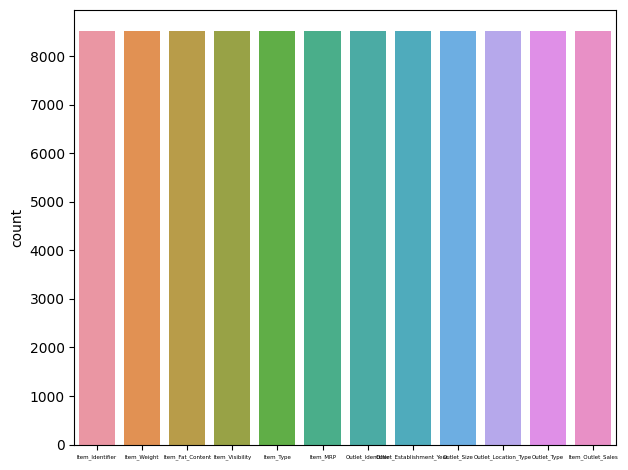

In [101]:
a=sns.countplot(df_train.isna())
a.set_xticklabels(a.get_xticklabels(), fontsize=4)
plt.tight_layout()
plt.show()

In [102]:
## so now we can find out there are no null values by this bar chart

<Axes: >

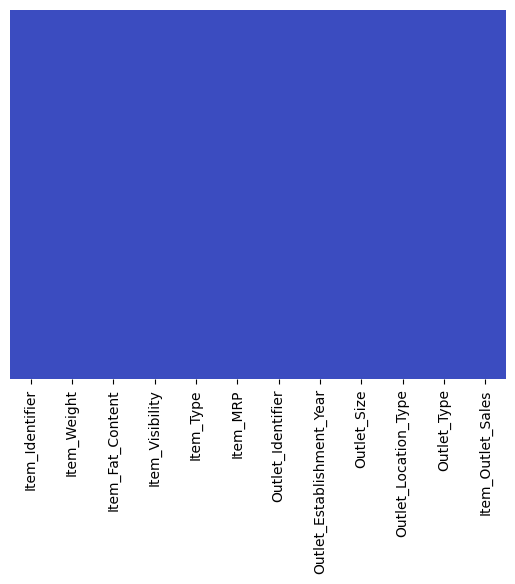

In [103]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Feature Selection

In [104]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [105]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
## The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store
# Here Outlet_Identifier and Item_Identifier are not that usefull to solve this problem

In [107]:
df_train=df_train.drop(['Outlet_Identifier','Item_Identifier'],axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
df_train.shape

(8523, 10)

# Now lets plot every cloumns

<Axes: xlabel='Item_Fat_Content'>

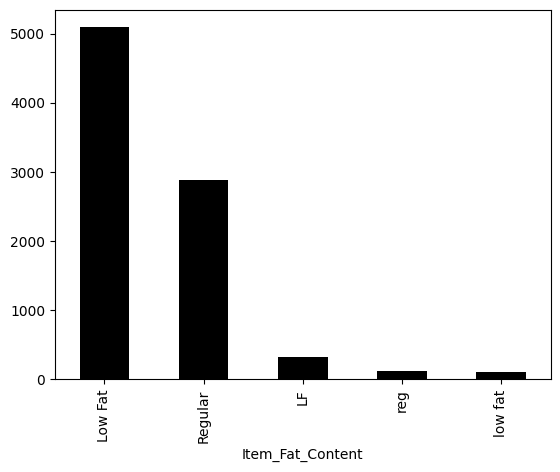

In [109]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'black')

In [110]:
#here we can find values like Low Fat ,LF,low fat are same so we will replace them and also Regular and reg

In [111]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].str.replace("LF","Low Fat")
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].str.replace("low fat","Low Fat")
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].str.replace("reg","Regular")

In [112]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content'>

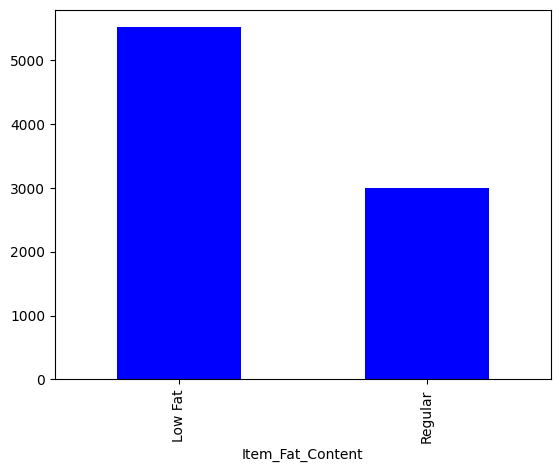

In [113]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color='blue')

<Axes: xlabel='Item_Type'>

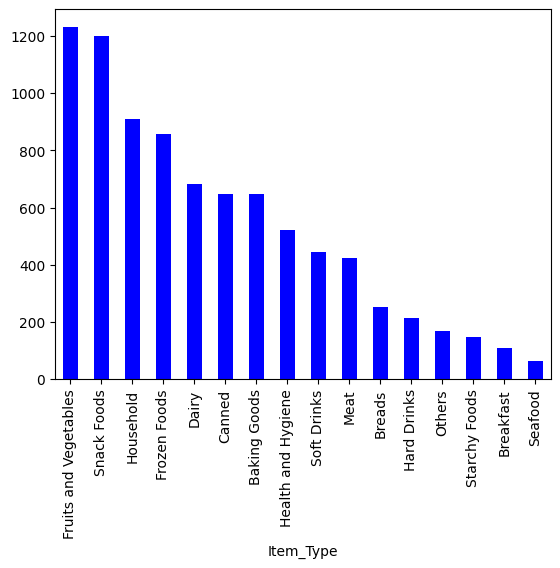

In [114]:
df_train['Item_Type'].value_counts().plot(kind='bar',color='blue')

<Axes: xlabel='Outlet_Establishment_Year'>

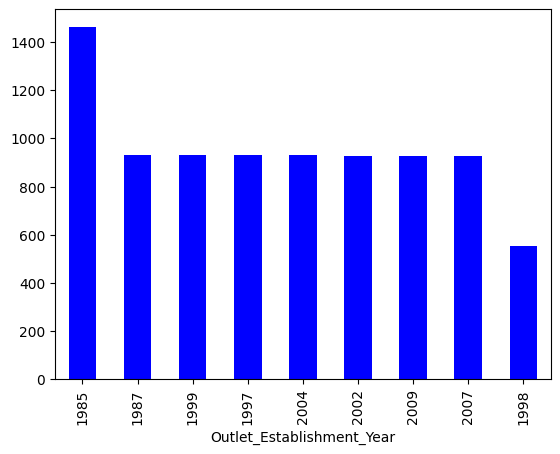

In [115]:
df_train['Outlet_Establishment_Year'].value_counts().plot(kind='bar',color='blue')

In [116]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [117]:
df_train.value_counts('Outlet_Size')

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

<Axes: xlabel='Outlet_Size'>

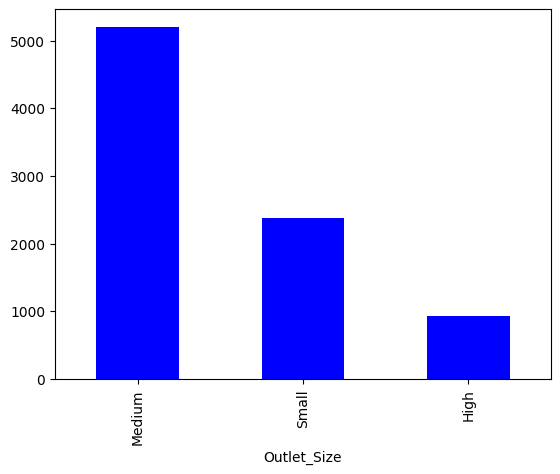

In [118]:
df_train['Outlet_Size'].value_counts().plot(kind='bar',color='blue')

In [119]:
df_train['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='Outlet_Location_Type'>

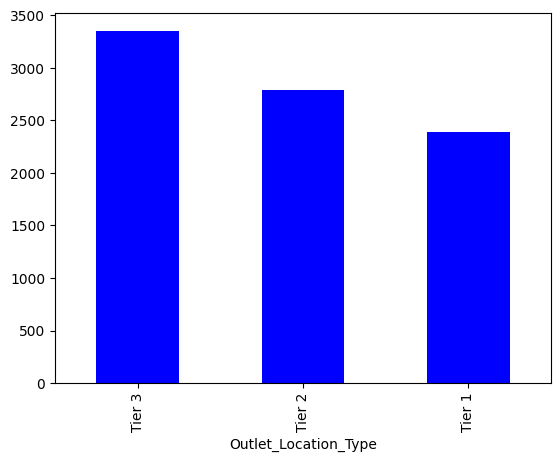

In [120]:
df_train['Outlet_Location_Type'].value_counts().plot(kind='bar',color='blue')

In [121]:
df_train['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<Axes: xlabel='Outlet_Type'>

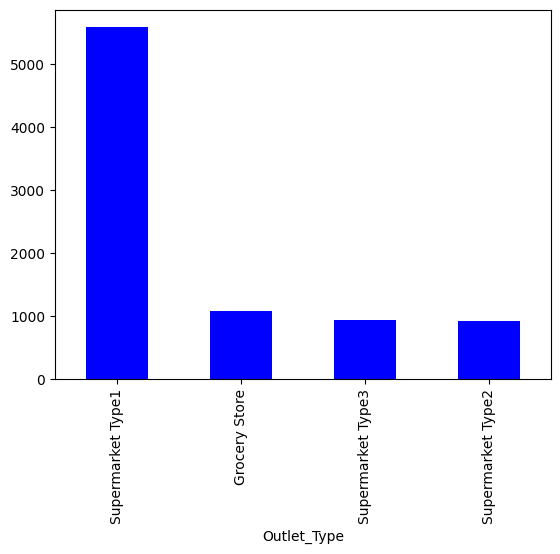

In [122]:
df_train['Outlet_Type'].value_counts().plot(kind='bar',color='blue')

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


# visualization of integer/float data

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

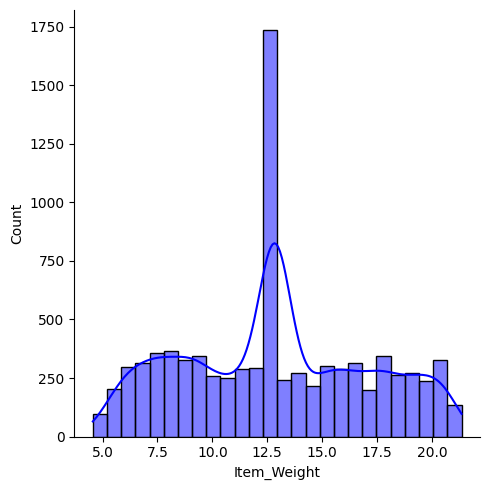

In [124]:
y=df_train['Item_Weight']
plt.figure(1)
sns.displot(y,kde=True,color='blue')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

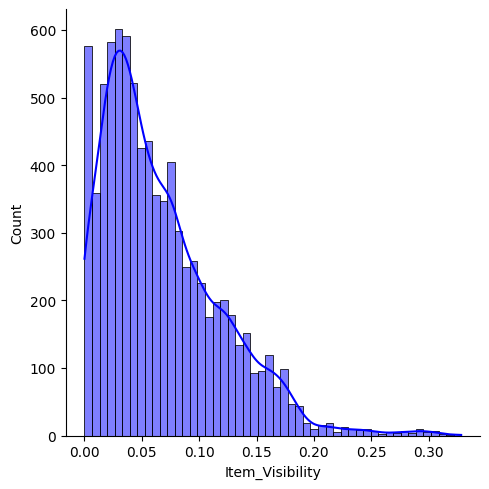

In [125]:
y=df_train['Item_Visibility']
plt.figure(1)
sns.displot(y,kde=True,color='blue')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

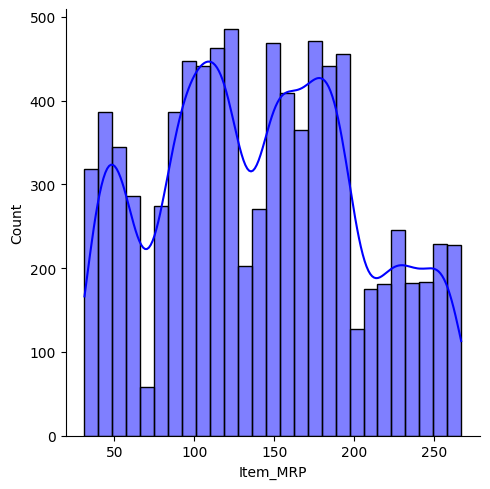

In [126]:
y=df_train['Item_MRP']
plt.figure(1)
sns.displot(y,kde=True,color='blue')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

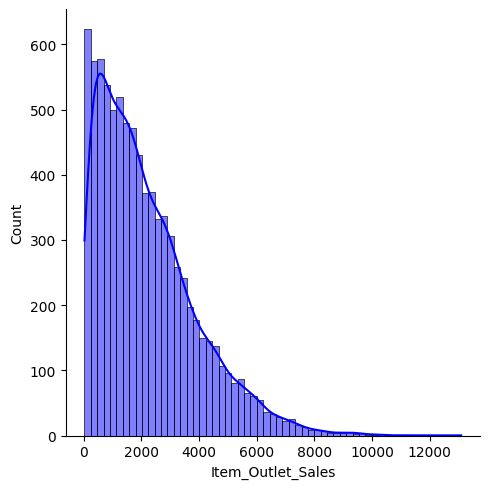

In [127]:
y=df_train['Item_Outlet_Sales']
plt.figure(1)
sns.displot(y,kde=True,color='blue')

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

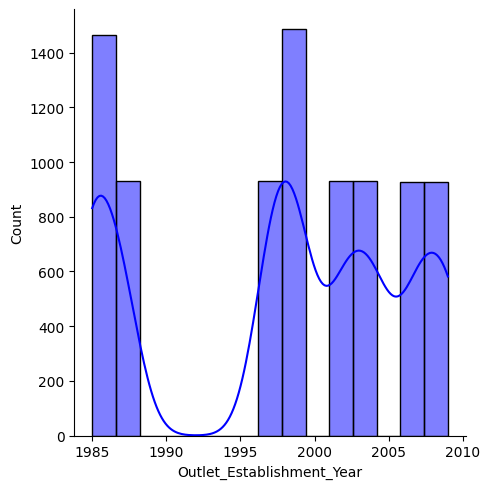

In [128]:

y=df_train['Outlet_Establishment_Year']
plt.figure(1)
sns.displot(y,kde=True,color='blue')

In [129]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [130]:
df_train['Qty_Sold']=(df_train["Item_Outlet_Sales"]/df_train["Item_MRP"])
df_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Qty_Sold
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,4.021967
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


In [131]:
categorical_columns=[x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [132]:
df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [133]:
for col in categorical_columns:
    print('Frequency for category of variable is')
    print(df_train[col].value_counts())
    print("\n")

Frequency for category of variable is
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


Frequency for category of variable is
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Frequency for category of variable is
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64


Frequency for category of variable is
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


Frequency for category of variable is
Outlet_Type
Supermarket Type1    557

ENCODING CATEGORICAL VARIABLES

In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_train.columns:
    df_train[col]=le.fit_transform(df_train[col])


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Weight                8523 non-null   int64
 1   Item_Fat_Content           8523 non-null   int32
 2   Item_Visibility            8523 non-null   int64
 3   Item_Type                  8523 non-null   int32
 4   Item_MRP                   8523 non-null   int64
 5   Outlet_Establishment_Year  8523 non-null   int64
 6   Outlet_Size                8523 non-null   int32
 7   Outlet_Location_Type       8523 non-null   int32
 8   Outlet_Type                8523 non-null   int32
 9   Item_Outlet_Sales          8523 non-null   int64
 10  Qty_Sold                   8523 non-null   int64
dtypes: int32(5), int64(6)
memory usage: 566.1 KB


In [136]:
df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(df_train.shape)

(8523, 34)


In [137]:
df_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Qty_Sold',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [138]:
df = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Type_0',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales', 'Qty_Sold']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales,Qty_Sold
0,284,664,5592,4,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,2540,4084
1,57,880,473,8,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,422,2217
2,376,715,2901,4,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,1639,3972
3,393,0,4227,3,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,670,1119
4,265,0,627,1,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,865,5315


In [139]:
df_train.shape

(8523, 34)

In [140]:
X = df.iloc[:,0:33].values
y = df.iloc[:,-1].values

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [142]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [143]:
X_train_std= sc.fit_transform(X_train)

In [144]:
X_test_std= sc.transform(X_test)

In [145]:
X_train_std

array([[ 0.92959123, -0.42807592,  1.54099228, ..., -0.35235634,
        -0.3473389 ,  0.52025567],
       [ 0.28175459, -1.05354187,  0.74826148, ..., -0.35235634,
        -0.3473389 ,  0.95824974],
       [-0.10485759, -0.71742699, -0.49049191, ..., -0.35235634,
        -0.3473389 , -0.19596789],
       ...,
       [-0.07351066, -0.17087497, -0.69982518, ..., -0.35235634,
        -0.3473389 , -0.21987824],
       [ 0.3757954 ,  0.29008258, -1.47887796, ..., -0.35235634,
        -0.3473389 , -1.18063943],
       [ 0.0414281 , -1.546232  , -1.18034017, ..., -0.35235634,
        -0.3473389 , -0.86219709]])

In [146]:
X_test_std

array([[ 1.12812181, -1.14038894, -0.91926829, ..., -0.35235634,
        -0.3473389 , -0.097066  ],
       [ 0.29220357,  1.68798645, -0.93175692, ..., -0.35235634,
        -0.3473389 , -1.36866169],
       [ 1.00273408, -0.60260513, -0.02127615, ..., -0.35235634,
        -0.3473389 ,  1.25930274],
       ...,
       [-1.65130634, -0.27776367, -1.27489696, ..., -0.35235634,
        -0.3473389 , -0.90240994],
       [ 0.95048919, -1.45186931,  1.11994696, ..., -0.35235634,
        -0.3473389 ,  0.78218264],
       [ 0.77285656, -0.67442098,  0.16783742, ..., -0.35235634,
        -0.3473389 ,  0.78435631]])

In [147]:
Y_train

array([2640, 5430, 4105, ..., 4546, 2236, 2801], dtype=int64)

In [148]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [149]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [150]:
Y_pred_lr=lr.predict(X_test_std)

In [151]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [152]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.8993183012272485
551.139524116809
744.9871057457059


In [153]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [154]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [155]:
Y_pred_rf= rf.predict(X_test_std)

In [156]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.9990824448578938
53.57032140762463
71.1196442235674
